In [44]:
import numpy as np
import pandas as pd

In [3]:
import h2o
#h2o.init()
h2o.init(ip="127.0.0.1", max_mem_size_GB = 100, nthreads = 10)

Checking whether there is an H2O instance running at http://127.0.0.1:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_212"; OpenJDK Runtime Environment (build 1.8.0_212-b04); OpenJDK 64-Bit Server VM (build 25.212-b04, mixed mode)
  Starting server from /workspaces/sefik/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpv3etq3h9
  JVM stdout: /tmp/tmpv3etq3h9/h2o_sefik_started_from_python.out
  JVM stderr: /tmp/tmpv3etq3h9/h2o_sefik_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Europe/Istanbul
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,1 month and 16 days
H2O cluster name:,H2O_from_python_sefik_tvinyo
H2O cluster total nodes:,1
H2O cluster free memory:,88.9 Gb
H2O cluster total cores:,72
H2O cluster allowed cores:,10
H2O cluster status:,"accepting new members, healthy"


# Load data set

In [4]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target_name = 'iris_class'
class_names = ['setosa', 'versicolor', 'virginica']

In [5]:
features = h2o.import_file('iris-attr.data', col_names = feature_names)
labels = h2o.import_file('iris-labels.data', col_names = [target_name])

hf = features.cbind(labels)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
hf.tail(5)

sepal_length,sepal_width,petal_length,petal_width,iris_class
6.7,3,5.2,2.3,2
6.3,2.5,5,1.9,2
6.5,3,5.2,2,2
6.2,3.4,5.4,2.3,2
5.9,3,5.1,1.8,2


In [7]:
hf.shape

(150, 5)

In [8]:
hf['iris_class'] = hf['iris_class'].asfactor() #this is a classification problem

# Modelling

In [9]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [10]:
model = H2OGradientBoostingEstimator(
    ntrees = 10
    , learn_rate = 0.01
    , stopping_rounds = 25
    , stopping_metric = "Logloss"
)

In [11]:
model.train(x = feature_names, y = target_name
    , training_frame = hf
    , model_id = "GBM_for_iris"
)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [12]:
model

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_for_iris


Model Summary: 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,10.0,30.0,4332.0,1.0,5.0,4.033333,2.0,9.0,6.966667




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3691925592547257
RMSE: 0.6076121783298337
LogLoss: 0.9358588714809719
Mean Per-Class Error: 0.04

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,50.0,0.0,0.0,0.00,0 / 50
1,0.0,49.0,1.0,0.02,1 / 50
2,0.0,5.0,45.0,0.10,5 / 50
3,50.0,54.0,46.0,0.04,6 / 150



Top-3 Hit Ratios: 

,k,hit_ratio
0,1,0.96
1,2,1.00
2,3,1.00



Scoring History: 

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
0,,2019-10-10 20:14:00,0.015 sec,0.0,0.666667,1.098612,0.64
1,,2019-10-10 20:14:00,0.120 sec,1.0,0.660597,1.080573,0.04
2,,2019-10-10 20:14:01,0.218 sec,2.0,0.654566,1.062976,0.04
3,,2019-10-10 20:14:01,0.260 sec,3.0,0.648551,1.045737,0.04
4,,2019-10-10 20:14:01,0.292 sec,4.0,0.642598,1.028972,0.04
5,,2019-10-10 20:14:01,0.330 sec,5.0,0.636661,1.012534,0.04
6,,2019-10-10 20:14:01,0.351 sec,6.0,0.630764,0.996476,0.04
7,,2019-10-10 20:14:01,0.364 sec,7.0,0.624908,0.980785,0.04
8,,2019-10-10 20:14:01,0.375 sec,8.0,0.619093,0.965448,0.04
9,,2019-10-10 20:14:01,0.386 sec,9.0,0.613319,0.950454,0.04



Variable Importances: 

,variable,relative_importance,scaled_importance,percentage
0,petal_width,617.527466,1.000000e+00,7.437300e-01
1,petal_length,211.835083,3.430375e-01,2.551273e-01
2,sepal_length,0.948798,1.536446e-03,1.142701e-03
3,sepal_width,0.000037,6.063723e-08,4.509772e-08


In [13]:
variables = model._model_json['output']['variable_importances']['variable']
scaled_importance = model._model_json['output']['variable_importances']['scaled_importance']

In [14]:
variables

['petal_width', 'petal_length', 'sepal_length', 'sepal_width']

In [15]:
scaled_importance

[1.0, 0.3430375080182297, 0.0015364461587614418, 6.063722513935219e-08]

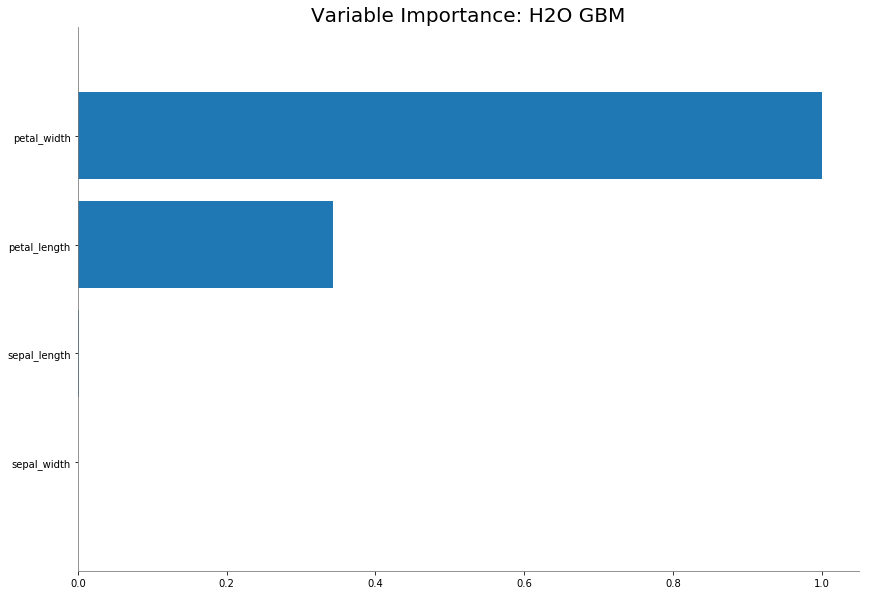

In [17]:
model.varimp_plot()

# Predictions

In [18]:
predictions = model.predict(test_data = hf)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [19]:
predictions.tail(5)

predict,p0,p1,p2
2,0.300648,0.300631,0.398721
2,0.304435,0.304418,0.391146
2,0.300647,0.300631,0.398722
2,0.299618,0.307002,0.39338
2,0.299379,0.307555,0.393066


In [20]:
predictions_pd = predictions['predict'].as_data_frame()

In [21]:
def h2opredict(nf): #nf is numpy array
    df = pd.DataFrame(nf, columns = feature_names) #numpy to pandas
    df[target_name] = 0
    hf = h2o.H2OFrame(df) #pandas to h2o frame
    predictions = model.predict(test_data = hf)
    predictions_pd = predictions[predictions.columns[1:]].as_data_frame() #h2o frame to pandas
    return predictions_pd.values

# Explainer

In [22]:
import shap

/workspaces/sefik/.local/lib/python3.6/site-packages/dask/config.py:129: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [23]:
df = hf.as_data_frame()
df = df.drop(columns = ['iris_class'])

In [24]:
#print(h2opredict(df.tail().values))
#print(type(h2opredict(df.tail().values)))

In [25]:
explainer = shap.KernelExplainer(h2opredict, df, link="logit")

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
shap_values = explainer.shap_values(df, nsamples=100)

In [27]:
shap.initjs()

# Single Explanation

In [28]:
sample = 17 #explain 17th instance in the data set

In [29]:
labels_pd = labels.as_data_frame()

actual = labels_pd.iloc[sample].values[0]
prediction = predictions_pd.iloc[sample]['predict']

print("Prediction for ",sample,"th instance is ",prediction," whereas its actual value is ",actual)

Prediction for  17 th instance is  0  whereas its actual value is  0


In [37]:
shap.force_plot(explainer.expected_value[prediction], shap_values[prediction][sample,:], df.iloc[sample])

# Many Explanations

In [39]:
idx = 0
print(class_names[idx])
shap.force_plot(explainer.expected_value[idx], shap_values[idx], df, link="logit")

setosa


In [40]:
idx = 1
print(class_names[idx])
shap.force_plot(explainer.expected_value[idx], shap_values[idx], df, link="logit")

versicolor


In [41]:
idx = 2
print(class_names[idx])
shap.force_plot(explainer.expected_value[idx], shap_values[idx], df, link="logit")

virginica


# Feature Importance

In [ ]:
#Calculating contributions is currently not supported for multinomial models.
#contributions = model.predict_contributions(hf)

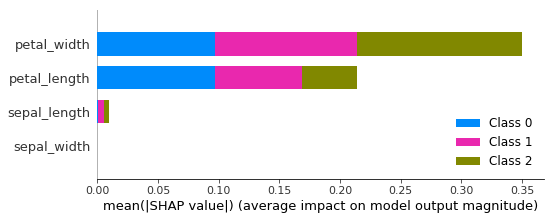

In [42]:
shap.summary_plot(shap_values, features.as_data_frame(), plot_type="bar")

Feature importances for  setosa


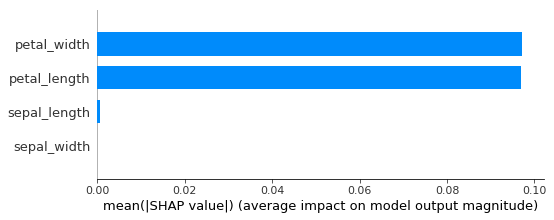

----------------------
Feature importances for  versicolor


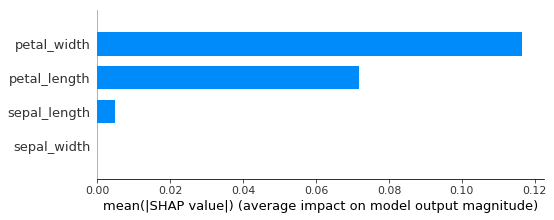

----------------------
Feature importances for  virginica


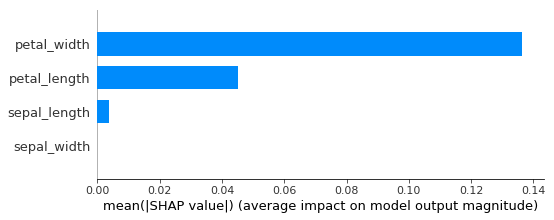

----------------------


In [43]:
for i in range(0, len(class_names)):
    current_class = class_names[i]
    print("Feature importances for ",current_class)
    shap.summary_plot(shap_values[i], features.as_data_frame(), plot_type="bar")
    print("----------------------")